# Predict student admission based on marks in two exams


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load file data
import os
path=os.getcwd()#gets current working directory
path=path+'/andrew_ng_data/exercise2'
data=pd.read_csv(path,header=None,names=['Exam1','Exam2','Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
positive=data[data['Admitted'].isin([1])]
negative=data[data['Admitted'].isin([0])]

In [4]:
positive.head()

,Exam1,Exam2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


In [5]:
negative.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0


Text(0,0.5,'Exam2 score')

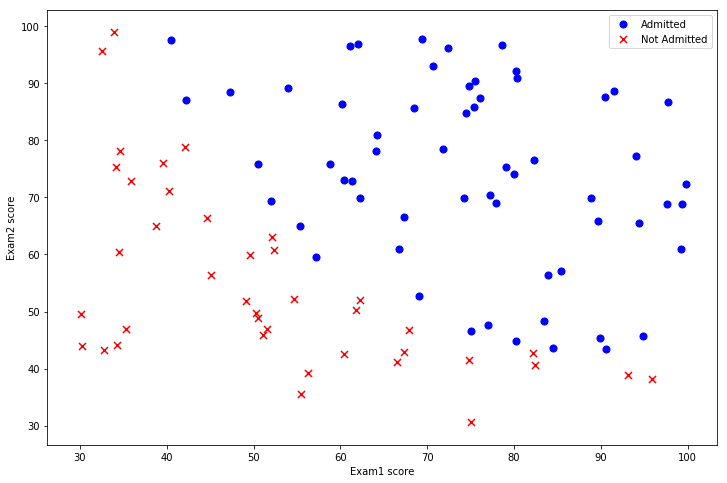

In [6]:
fig, ax=plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'],positive['Exam2'],s=50,marker='o',c='b',label='Admitted')
ax.scatter(negative['Exam1'],negative['Exam2'],s=50,marker='x',c='r',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 score')
ax.set_ylabel('Exam2 score')

In [7]:
def sigmoid(z):#activation function for output of logistic regression, it converts continuous input into a value between 0 and 1
    return 1/(1+np.exp(-z))

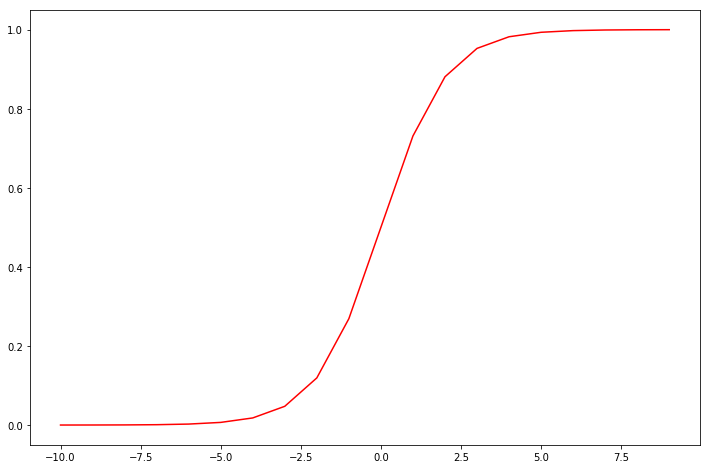

In [8]:
nums=np.arange(-10,10,step=1)
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums),'r')

In [9]:
#define cost function
def cost(theta,X,y):
    X=np.matrix(X)
    y=np.matrix(y)
    theta=np.matrix(theta)
    first_term=np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second_term=np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first_term-second_term)/(len(X))

In [10]:
#add ones column
data.insert(0,'Ones',1)

In [11]:
#set X,y
cols=data.shape[1]
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

In [12]:
#initialize parameter arrays
X=np.array(X.values)
y=np.array(y.values)
theta=np.zeros(3)

In [13]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

In [14]:
cost(theta,X,y)

0.6931471805599453

In [28]:
def gradient(theta,X,y):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)
    error=sigmoid(X*theta.T)-y
    for i in range(parameters):
        term=np.multiply(error,X[:,i])
        grad[i]=np.sum(term)/len(X)
    return grad

In [33]:
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))  
cost(result[0], X, y) 

0.20349770158947458

In [30]:
def predict(theta,X):
    probability=sigmoid(X*theta.T)
    return [1 if x>=0.5 else 0 for x in probability]

In [35]:
theta_min=np.matrix(result[0])
predictions=predict(theta_min,X)
correct = [1 if ((a==1)and b==1) or (a==0 and b==0) else 0 for (a,b) in zip(predictions,y)]
accuracy=(sum(map(int,correct))%len(correct))
print ('accuracy={0}%'.format(accuracy))

accuracy=89%
